### ***Kaggle Titanic Comptetion***

*Titanic veri setini alarak veri seti uzerinde model kurulum işlemleri gerçeklestiriyor olacağız.*

*Elimde test ve train olmak uzere iki veri seti bulunmakta ve train veri seti ile model kurulum işlemini gerçeklestiriyor olacagım ve  ardından test veri seti ile model test edilecektir.*

In [1]:
# Pandas
import pandas as pd

In [2]:
# Pull Data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df , test_df]

In [3]:
# Head - 5 Data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Tail - Last 5 Data
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Columns 
list(train_df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
# Looking at structural information of Test and Train data sets
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

*Bu, diğer erken bilgilere ek olarak, gerçek sorun etki alanının eğitim veri kümesinin temsili olduğunu belirlememize yardımcı olur.*

* *Toplam numuneler, Titanik'teki (2.224) gerçek yolcu sayısının 891 veya %40'ı kadardır.*
* *Hayatta kalmak 0 veya 1 değerleri olan kategorik bir özelliktir.*
* *Canlı kalma oranı %32'yi temsil eden numunelerin yaklaşık %38'i hayatta kalmıştır.*
* *Yolcuların çoğu (>%75) ebeveynleri veya çocuklarıyla seyahat etmemiştir.*
* *Yolcuların %30'a yakını araçta kardeş ve/veya eşi bulunuyordu.*
* *512 doların üzerinde ödeme yapan yolcu sayısı (<%1) nedeniyle ücretler önemli ölçüde değişkenlik gösterdi*.
* *65-80 yaş aralığında çok az yaşlı yolcu (<%1).*

In [7]:
# Describe - descriptive statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
# 177 data-Age is null
train_df["Age"].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [9]:
# Data with null Age - 5 Data
train_df[train_df["Age"].isnull() == True].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [10]:
# Categorical Variables
# Sometimes can be 'categorical'
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
# Digital Variables
train_df.describe(include=['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Veri analizine dayalı varsayımlar***

*Şu ana kadar yapılan veri analizlerine dayalı olarak aşağıdaki varsayımlara ulaşıyoruz. Uygun adımları atmadan önce bu varsayımları daha fazla doğrulayabiliriz*.


* *Her özelliğin Hayatta Kalma ile ne kadar iyi ilintili olduğunu bilmek istiyoruz. Bunu projenin daha erken safhalarında yapmak ve bu hızlı ilintilere projenin ilerleyen aşamalarında modellenmiş korelasyonları da dahil etmek istiyoruz.*

* *Sağkalımla kesinlikle ilişkili olduğu için Yaş özelliğini tamamlamak isteyebiliriz.*
* *Hayatta kalma veya başka bir önemli özellikle de ilişkili olabileceğinden, Embarked özelliğini tamamlamak isteyebiliriz.*


* *Bilet özelliği yüksek tekrarlayan öğe oranı (%22) içerdiği ve Ticket ile sağkalım arasında bir korelasyon olmayabileceği için analizimizden çıkarılabilir*.
* *Kabin özelliği son derece eksik olduğu veya hem eğitim hem de test veri kümesinde birçok boş değer içerdiği için çıkartabiliriz*.
* *PassengerId hayatta kalmaya yardımcı olmadığı için eğitim veri setinden çıkarılabilir*
* *İsim özelliği nispeten standart değil, sağkalıma doğrudan etki etmeyebilir, bu nedenle çıkartabiliriz.*


* *Gemide toplam aile üyesi sayısını almak için Parch ve SibSp tabanlı Family adlı yeni bir özellik oluşturmak isteyebiliriz.*
* *Başlığı yeni bir özellik olarak çıkarmak için Ad özelliğini yapılandırmak isteyebiliriz.*
* *Age grupları için yeni bir özellik oluşturmak isteyebiliriz. Bu, sürekli bir sayısal özelliği sıra dışı bir kategorik özelliğe dönüştürür.*
* *Ayrıca, analizimize yardımcı olacaksa bir Fare range özelliği oluşturmak isteyebiliriz.*


*Daha önce belirtilen problem tanımına istinaden varsayımlarımıza da ekleme yapabiliriz.*

In [12]:
# The relative states of the variables
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
# Relationship of displaced change to other variables - Survived
print('_'*40)
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*40)
print(train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*40)
print(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean())
print('_'*40)
print(train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

________________________________________
      Sex  Survived
0  female  0.742038
1    male  0.188908
________________________________________
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
________________________________________
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
________________________________________
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


***Verileri görselleştirerek analiz edin***

*Şimdi verileri analiz etmek için görselleştirmeleri kullanarak varsayımlarımızdan bazılarını doğrulamaya devam edebiliriz.*

*İlişkili sayısal özellikler*
* *Öncelikle sayısal özellikler ile çözüm hedefimiz (Hayatta Kaldık) arasındaki korelasyonu anlayalım.*

* *Histogram grafiği, Yaş gibi sürekli sayısal değişkenleri analiz etmede kullanışlıdır; burada şeritler veya aralıklar kullanışlı desenleri belirlemeye yardımcı olur. Histogram, örneklerin otomatik olarak tanımlanmış bölmeler veya eşit aralıklı bantlar kullanarak dağılımını gösterebilir. Bu, belirli gruplarla ilgili soruları cevaplamamıza yardımcı olur (Bebeklerin sağkalım oranları daha yüksek miydi?)*

*Geçmiş grafiği görselleştirmelerindeki x ekseninin, numune veya yolcu sayısını temsil ettiğini unutmayın.*

***Gözlemler***

* *Bebeklerin (Yaş <=4) hayatta kalma oranı yüksektir*.
* *En yaşlı yolcular (Yaş = 80) sağ kaldılar.*
* *Çok sayıda 15-25 yaş grubu hayatta kalamadı.*
* *Yolcuların çoğu 15-35 yaş aralığındadır.*

***Kararlar.***

* *Bu basit analiz sonraki iş akışı aşamaları için karar olarak varsayımlarımızı doğrular.*

* *Model eğitimimizde Yaş'ı (varsayım sınıflandırmamız #2) göz önünde bulundurmalıyız.*
* *Age (Yaş) özelliğini null değerler için tamamlayın (1'i tamamlayın).*
* *Yaş gruplarını gruplandırmalıyız (3.oluşturarak).*


In [14]:
# Import Seaborn , Matplotlib
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

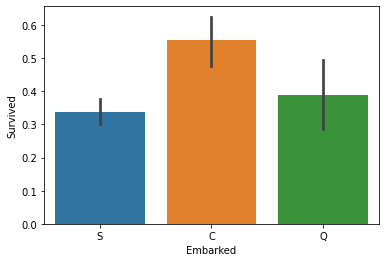

In [15]:
# Barplot
sbn.barplot(x = "Embarked",y = "Survived" , data= train_df);

* *Embarked classın ıcerisinden C > Q > S olarka hayatta kalma yogunluklarını gorebiliyoruz.*

***Facetgrid kullanımı***

*degisken = seaborn.FacetGird(veri_seti , col --> sutun olarak goster , row = satır olarak goster  , col = degisken[bagımlı oluyor genelde] , row =degisken[bagımlı oluyor genelde])*

* *param1 : plt.grafik_turu*
* *param2 , param3 ... : degiskenler*
* *bins = 20 --> daha net gosterir*

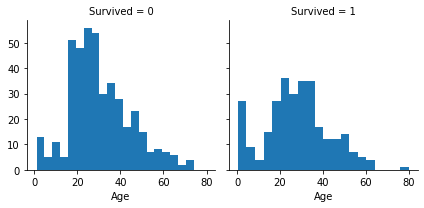

In [16]:
# Facetgrid
grid = sbn.FacetGrid(train_df , col = 'Survived')
grid.map(plt.hist , 'Age' , bins=20);

*Grafigi yorumladığımızda hayatta kalanların ve kalmayanların yaşlara gore dağılımını gösteriyor.*

* *Hayatta kalmayınların coğu 20 - 40 yas arası olduğunu görüyoruz*
* *Hayatta kalanların arasında 70 yaşında olmayanları ve 80 yaşında hayatta kalanların olduğunu görüyoruz.*

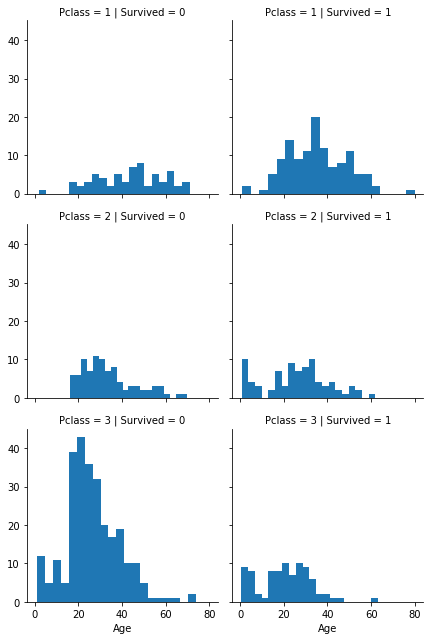

In [17]:
# Facetgrid
grid  = sbn.FacetGrid(train_df , col = 'Survived' , row = 'Pclass');
grid.map(plt.hist , 'Age', bins = 20);
grid.add_legend();

*Grafiği yorumladıgımızda , Pclass sınıflarına gore ve yasa gore hayatta kalanların ve kalmayanların dagılımını goruyor oluyoruz.*

* *Pclass = 3  , 20 < 45 Age degerine sahip olan ınsnlarım hayatta kalmama dagılımları oldukca yuksek aynı sekilde Pclass = 3 sınıfına ait yolcuların hayatta kalma dagılımlarıda dusuk.*

* *En yuksek hayatta kalma dagılımı Pclass = 1 de oldugunu goruyoruz.*

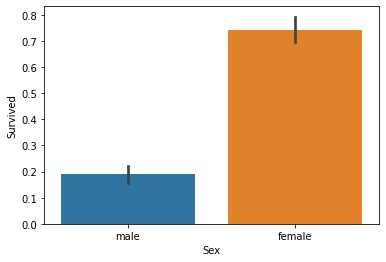

In [18]:
# Barplot
sbn.barplot(x = 'Sex', y = 'Survived' ,data=train_df);

*Grafigi yorumladıgımızda cinsiyete gore hayatta kalan ve kalmayanların dagılımlarını goruyor oluyoruz.*

* *Kadın yolcuların daha fazla hayatta kaldıgını ve erkek yolcuların daha az hayatta kaldıgını goruyoruz.*

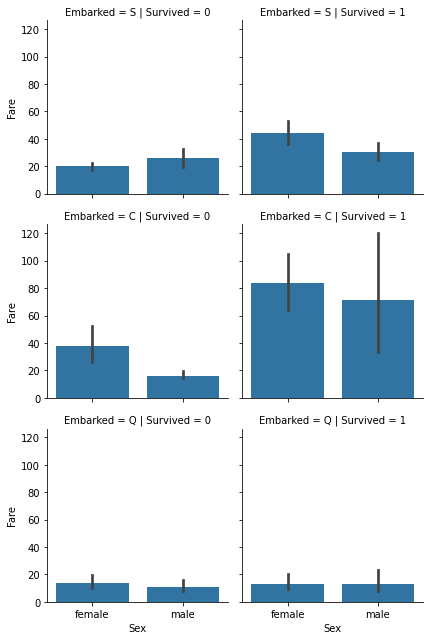

In [19]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sbn.FacetGrid(train_df, row='Embarked', col='Survived');
grid.map(sbn.barplot, 'Sex', 'Fare'); # x = Sex ,y = Fare , hue = none
grid.add_legend();

*Grafikte embarked , fare  ve cinsiyete gore hayatta kalma dagılımlarını goruyor oluyoruz.*

***Değişim verileri***

*Veri setlerimiz ve çözüm gereksinimlerimizle ilgili çeşitli varsayımlar ve kararlar topladık. Şimdiye kadar bunlara ulaşmak için tek bir özelliği veya değeri değiştirmek zorunda kalmadık. Şimdi de hedeflerimizi düzeltmek, oluşturmak ve tamamlamak için kararlarımızı ve varsayımlarımızı uygulamaya geçirelim.*

***Özellikleri bırakarak düzeltme***

* *Bu, gerçekleştirmek için iyi bir başlangıç hedefidir. Özellikleri düşürerek daha az veri noktasıyla uğraşıyoruz. Dizüstü bilgisayarlarımızı hızlandırıyor ve analizi kolaylaştırıyor.*

* *Varsayımlarımıza ve kararlarımıza dayanarak Cabin (düzeltme #2) ve Ticket (düzeltme #1) özelliklerini bırakmak istiyoruz.*

*Uygunsa, tutarlı kalmak adına, hem eğitim hem de test veri setleri üzerinde birlikte operasyonlar gerçekleştirdiğimizi unutmayın.*

In [20]:
# Removing Ticket , Cabin changes from the Train and Test set
train_df = train_df.drop(['Ticket','Cabin'], axis = 1)
test_df = test_df.drop(['Ticket','Cabin' ], axis = 1);
combine = [train_df , test_df]

In [21]:
# Columns
print(list(train_df.columns))
print(list(test_df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


*Kaldırma sebebimiz modelle yaparken gereksiz bir kirlilik olusturuyor ve veri setine cok etkisi olmadıgını goruyoruz bu yuzden kaldırıyoruz.*

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


***Kategorik bir özelliği dönüştürme***

*Artık, dize içeren özellikleri sayısal değerlere dönüştürebiliriz. Bu çoğu model algoritması için gereklidir. Bunu yapmak, özelliği tamamlama hedefine ulaşmamızda da bize yardımcı olacaktır.*

* *Cinsiyet özelliğini, kadın=1 ve erkek=0 olan Cinsiyet adlı yeni bir özelliğe dönüştürerek başlayalım.*
* *Embarked ozelligini ,  S = 2 , C = 0 , Q = 1 olmak uzere numeric donusumunu gerceklestiriyor olacagız..*


In [23]:
# Sex
# combine= [train_df ,test_df] sıra sıra her bir veri setinde donusum yapacak
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

*Embarked donusum ıslemini LabelEncoder methodu ile gerceklestiriyor olacagız.*

* *LabelEncoder objesini kullarak dönüşüm işlemini gerçekleştirdiğimizde 0 dan baslayarak 0 1 0 1 .. dönüştürme işlemi gerçekleştiricektir*

In [24]:
# Sklearn preproccessing - LabelEncoder
from sklearn import preprocessing

In [25]:
# Object Call
lble = preprocessing.LabelEncoder()

# fit_transform() --> Convert using function
train_df["Embarked"] = lble.fit_transform(train_df["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


In [26]:
# Data set final form
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,2


***Sayısal bir sürekli özelliği tamamlamak ( Eksik veri , aykırı gozlem analizleri )***

*Şimdi eksik veya boş değerlere sahip özellikleri tahmin etmeye ve tamamlamaya başlamalıyız. Bunu ilk olarak Age özelliğinde yapacağız.*

* *Sayısal bir kesintisiz özelliği tamamlamak için üç yöntem düşünebiliriz.*

*Basit bir yöntem, ortalama ve standart sapma arasında rastgele sayılar oluşturmaktır*

In [27]:
# Select numeric variables
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])
numeric_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [28]:
# Missing data detection within the data set
numeric_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [29]:
# Age mean value
numeric_df['Age'].mean()

29.69911764705882

*Age degiskenin ortalaması goruldugu uzere cıkmıs oldu.*

In [30]:
# Missing data analysis, visualization
import missingno as msno

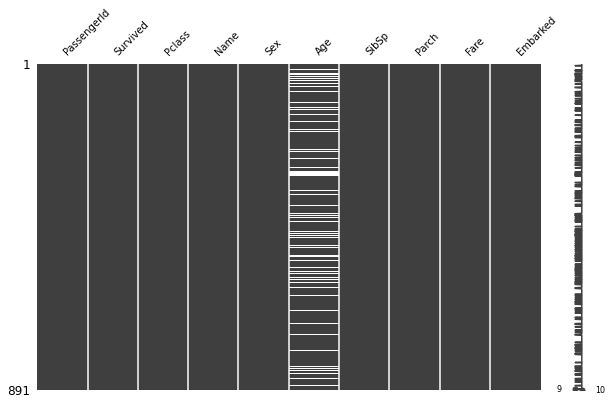

In [31]:
# Do you randomly or logically view missing data on the chart
# Let's determine if # is created

msno.matrix(train_df,figsize = (10, 6) , fontsize=10);

*Grafige baktıgımızda eksik verilerin Age degiskeninde toplandıgını daha net bir sekilde gorebiliyoruz.*

***Makine ogrenmesi ile eksik veri doldurma***

* *Makine ogrenmesinin kutuphanelerinden olan knnimput kullanıyor olacagız ve method olarak  ycimpute.imputer kullanıcaz*
* *1. Veri setindeki degiskenleri bir degere ata*
* *2. veri setini numpy arrayına donusturme islemi*
* *3  Eklediğimiz kütüphane içerisindeki KNN() fonksiyonunu cağırmak*
* *4. KNN(k = 4)  ile birlikte k burda komşuluk ifadesini temsil ediyor.*
* *5. complete() ile birlikte olusturduğumuz numpy dizisinin içindeki eksik verileri doldurucaktır.*

*Bir cok eksik veri doldurma ve methodları , mantıkları bulunmaktadır.*

In [32]:
# Library
from ycimpute.imputer import knnimput
import numpy as np

In [33]:
# Copy data set
df = numeric_df.copy()

In [34]:
# Pull Variables
variables = df.columns

In [35]:
# Converting a data set into numpy array
df_numpy = np.array(df)

In [36]:
# Eksik verileri makine ogrenmesi ile doldurma ıslemi
dff = knnimput.KNN(k = 4).complete(df_numpy)

Imputing row 1/891 with 0 missing, elapsed time: 0.107
Imputing row 101/891 with 0 missing, elapsed time: 0.108
Imputing row 201/891 with 0 missing, elapsed time: 0.109
Imputing row 301/891 with 1 missing, elapsed time: 0.110
Imputing row 401/891 with 0 missing, elapsed time: 0.110
Imputing row 501/891 with 0 missing, elapsed time: 0.111
Imputing row 601/891 with 0 missing, elapsed time: 0.112
Imputing row 701/891 with 0 missing, elapsed time: 0.112
Imputing row 801/891 with 0 missing, elapsed time: 0.113


In [37]:
dff = pd.DataFrame(dff , columns=variables)
dff.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,2.0


In [38]:
# Null data check
dff.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [39]:
# Our main data set is null character
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [40]:
# Integrating with our main set
train_df['Age']  = dff['Age']
train_df['Fare'] = dff['Fare']
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [41]:
# Viewing our data set
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


*Test veri seti icin aynı islemleri uygulama*

In [42]:
# Call Object
lble = preprocessing.LabelEncoder()

# fit_transform() Convert using function
test_df["Embarked"] = lble.fit_transform(test_df["Embarked"])
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,2


In [43]:
# Fill Null data
numeric_test = test_df.select_dtypes(include=['int64', 'float64'])
numpy_test_df = np.array(numeric_test)
var = numeric_test.columns

In [44]:
dff_test = knnimput.KNN(k = 4).complete(numpy_test_df)

Imputing row 1/418 with 0 missing, elapsed time: 0.047
Imputing row 101/418 with 0 missing, elapsed time: 0.048
Imputing row 201/418 with 1 missing, elapsed time: 0.049
Imputing row 301/418 with 0 missing, elapsed time: 0.049
Imputing row 401/418 with 0 missing, elapsed time: 0.050


In [45]:
# DataFrame
dff_test = pd.DataFrame(dff_test , columns=var)
dff_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [46]:
# Main test data fill
test_df['Age'] = dff_test['Age']
test_df['Fare'] = dff_test['Fare']

In [47]:
# Check
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

***Sayısal degiskenleri aralıklara sokma***

* *Age ve Fare degiskenlerini belli parcaya bolerek 0 - 1 gibi donusumlere yapabiliriz.*

*Bu islem modelin cok daha iyi sonuc vermesini saglayacaktır.*

In [48]:
# AGE
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,2


In [49]:
# FARE
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combine = [train_df, test_df]
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,1,2


*Yukarıda gerceklestirdigimiz islemden bahsedicek olursak veri setimizde bulunan age ve fare degiskenlerini parcalayarak o parcalara numeric degerler ile temsil etme islemi gerceklestirmis olduk.*

In [50]:
# We transformed it into an int because it was referred to as a float
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,2


**Model olun, tahmin edin ve çözün***

*Artık bir model eğitmeye ve gereken çözümü öngörmeye hazırız. 60'ın üzerinde tahmin modelleme algoritması vardır. Değerlendirebileceğimiz birkaç modele indirgemek için sorunun türünü ve çözüm gerekliliklerini anlamalıyız. Bizim sorunumuz bir sınıflandırma ve gerileme problemi. Çıktı (Hayatta Kaldı veya Kalmadı) ile diğer değişkenler veya özellikler (Cinsiyet, Yaş, Port...) arasındaki ilişkiyi tanımlamak istiyoruz. Modelimizi belirli bir veri kümesi ile eğitiyorken, denetimli öğrenme adı verilen makine öğrenimi kategorisini de gerçekleştiriyoruz. Bu iki kriter olan Denetimli Öğrenme artı Sınıflandırma ve Regresyon yardımıyla, model seçimlerimizi birkaç kritere indirebiliriz. Başarılarımız:*

* *Lojistik Regresyon*
* *KNN veya k-En Yakın Komşular*
* *Destek Vektör Makineleri*
* *Naive Bayes klasifikatörü*
* *Karar Ağacı*
* *Rassal Orman*
* *Perceptron*
* *Yapay sinir ağı*
* *RVM veya İlgi Vektör Makinesi*


In [51]:
# We choose independent and non-dependent models for our data set
X_train = train_df.drop(columns=['Survived','PassengerId','Name'], axis= 1)
Y_train = train_df['Survived']

In [52]:
# Test Data for Predict
X_test  = test_df.drop(columns=['PassengerId','Name'], axis=1).copy()

In [55]:
# Let's see the label and features set for the model.
print(X_train.shape)
print(Y_train.shape)

(891, 7)
(891,)


***Model kurulum ıslemleri***

*Model kurulum islemlerini iki asamada gerceklestiriyor olacagız;*
* *Modeli seç ve kur*
* *Kurulan model uzerinde tuning islemi gerceklestir*
* *Optimum parametre degerlerini bul ve final model kurulum ıslemini gerceklestir.*
* *Tahmin et ve bitir.*

#### ***Model Tuning***

*If you like, I can use these parameters for models.*

***Random Forest parameters***


* *rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0*




***Extra Trees Parameters***
* *et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0*




***AdaBoost parameters***
* *ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75*




***Gradient Boosting parameters***
* *gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0*




***Support Vector Classifier parameters*** 
* *svc_params = {
    'kernel' : 'linear',
    'C' : 0.025*
    

----

*I will only use the Random Forest model because it works best among them, but you can see it in turns trying*

In [56]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Random Forest Object
rfc_model = RandomForestClassifier().fit(X_train, Y_train)

***ÖNEMLİ PARAMETRELER***

* *n_estimators : Karar Ağacı sayısı*

* *max_depth: Dallanma derinliği* 

* *min_samples_split, min_samples_leaf, max_leaf_nodes: parametreleri dallanmayı etkliyen önemli parametrelerdir.*

* *max_features : parametresi karar ağaçlarını etkliyen önemli parametredir.*

*Önemli parametreleri yukarda belirttim fakat en önemlileri siyah olarak gösterilenlerdir.*

In [58]:
# Random Forest Estimators
rfc_model.n_estimators

100

In [59]:
# y_pred accuracy score
Y_pred = rfc_model.predict(X_test) # Predict X-test
rfc_model.score(X_train, Y_train) # accuracy_score 
acc_random_forest = rfc_model.score(X_train, Y_train) 

In [60]:
# accuracy score value
acc_random_forest

0.8922558922558923

In [69]:
# Submit
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [72]:
submission.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [74]:
# submission.to_csv('titatic_final_model.csv', index=False)

---